In [1]:
library(readxl)
library(ggplot2)
dplyr::lag(1:5, 2)
library(dplyr)
library(tidyr)
library(olsrr)
library(leaps)

Warning message:
"package 'readxl' was built under R version 4.4.2"


Warning message:
"package 'ggplot2' was built under R version 4.4.3"


[1] NA NA  1  2  3


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers




In [2]:
coachdata <- read.csv("C:/Users/trent/OneDrive/Documents/Repositories/NHL-Regression-Analysis-R/data/game_teams_stats.csv")
View(coachdata)

game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>
2017030417,54,home,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030417,15,away,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030416,54,away,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030416,15,home,FALSE,tbc,NA,0,0,0,0,0,0,0.0,0,0,0,NA
2017030415,54,home,FALSE,REG,Gerard Gallant,3,31,39,12,2,1,52.5,15,22,11,NA
2017030415,15,away,TRUE,REG,Barry Trotz,4,33,27,8,4,1,47.5,6,10,13,NA
2017030414,54,away,FALSE,REG,Gerard Gallant,2,30,39,32,4,0,51.6,7,8,8,left
2017030414,15,home,TRUE,REG,Barry Trotz,6,23,29,20,5,3,48.4,18,18,24,left
2017030413,54,away,FALSE,REG,Gerard Gallant,1,22,31,8,2,0,37.1,7,10,9,left


In [ ]:
coachdata<- coachdata %>%
  filter(!is.na(goals) & !is.na(shots)) %>%
  mutate(
    season_start = as.integer(substr(game_id, 1, 4)),
    game_type = substr(game_id, 5, 6)
  ) %>%
  filter(game_type == "02") %>% 
  group_by(season_start, team_id) %>%
  arrange(game_id) %>% 
  mutate(game_index = row_number()) %>%
  ungroup()
  coachdata

game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season_start,game_type,game_index
<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
2000020001,25,home,FALSE,OT,Ken Hitchcock,2,21,NA,22,9,1,NA,NA,NA,NA,left,2000,02,1
2000020001,21,away,FALSE,OT,Bob Hartley,2,28,NA,20,10,1,NA,NA,NA,NA,left,2000,02,1
2000020002,9,away,FALSE,OT,Jacques Martin,4,33,NA,20,6,2,NA,NA,NA,NA,right,2000,02,1
2000020002,6,home,FALSE,OT,Pat Burns,4,38,NA,12,10,2,NA,NA,NA,NA,right,2000,02,1
2000020003,16,away,FALSE,REG,Alpo Suhonen,2,21,NA,24,7,1,NA,NA,NA,NA,right,2000,02,1
2000020003,7,home,TRUE,REG,Lindy Ruff,4,30,NA,21,3,0,NA,NA,NA,NA,right,2000,02,1
2000020004,23,away,FALSE,REG,Marc Crawford,3,29,NA,16,3,0,NA,NA,NA,NA,left,2000,02,1
2000020004,4,home,TRUE,REG,Craig Ramsay,6,33,NA,8,7,3,NA,NA,NA,NA,left,2000,02,1
2000020005,20,home,FALSE,REG,Don Hay,3,21,NA,20,9,0,NA,NA,NA,NA,left,2000,02,1


In [4]:
coach_summary <- coachdata %>%
  filter(!is.na(head_coach)) %>%
  group_by(head_coach) %>%
  summarise(
    games = n(),
    total_goals = sum(goals, na.rm = TRUE),
    total_shots = sum(shots, na.rm = TRUE),
    avg_shooting_pct = round(mean(goals/shots, na.rm = TRUE), 3),
    wins = sum(won, na.rm = TRUE),
    win_rate = round(mean(won, na.rm = TRUE), 3)
  ) %>%
  filter(games >= 41) %>%
  arrange(avg_shooting_pct)
  coach_summary 

head_coach,games,total_goals,total_shots,avg_shooting_pct,wins,win_rate
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
Peter Horachek,108,236,3231,0.076,35,0.324
Tom Rowe,60,150,1978,0.078,24,0.400
Phil Housley,82,198,2558,0.079,25,0.305
Butch Goring,65,144,1804,0.080,17,0.262
Ron Rolston,51,105,1326,0.081,19,0.373
Bill Peters,328,816,10249,0.082,137,0.418
Kevin Dineen,146,337,4283,0.082,56,0.384
Rick Dudley,44,97,1196,0.084,14,0.318
Scott Arniel,123,306,3770,0.084,45,0.366


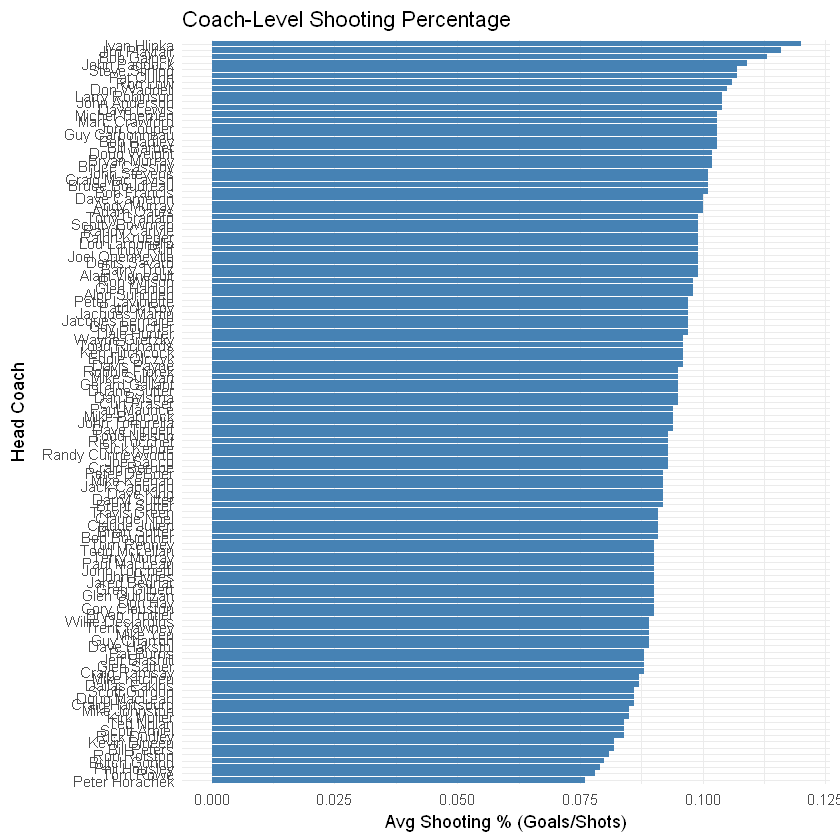

In [5]:
ggplot(coach_summary, aes(x = reorder(head_coach, avg_shooting_pct), y = avg_shooting_pct)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Coach-Level Shooting Percentage",
       x = "Head Coach", y = "Avg Shooting % (Goals/Shots)") +
  theme_minimal()

In [6]:
top_bottom_coaches <- coach_summary %>%
  arrange(avg_shooting_pct) %>%
  mutate(group = case_when(
    row_number() <= 10 ~ "Bottom 10",
    row_number() > (n() - 10) ~ "Top 10",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(group))

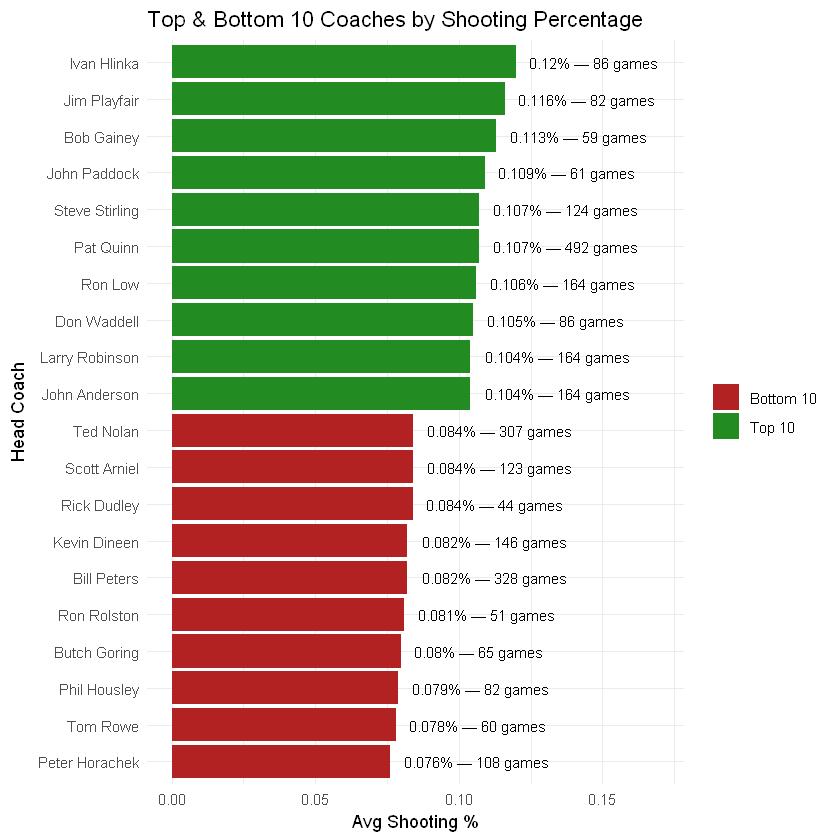

In [7]:
ggplot(top_bottom_coaches, aes(x = reorder(head_coach, avg_shooting_pct), 
                                y = avg_shooting_pct, fill = group)) +
  geom_col() +
  geom_text(aes(label = paste0(avg_shooting_pct, "% — ", games, " games")), 
            hjust = -0.1, size = 3.2) +
  coord_flip() +
  labs(title = "Top & Bottom 10 Coaches by Shooting Percentage",
       x = "Head Coach", y = "Avg Shooting %") +
  scale_fill_manual(values = c("Top 10" = "forestgreen", "Bottom 10" = "firebrick")) +
  theme_minimal() +
  theme(legend.title = element_blank()) +
  ylim(0, max(top_bottom_coaches$avg_shooting_pct) + 0.05)

Now I will analyze split the data by season to compare shooting percentages for each coach per season

In [8]:
coachdata <- coachdata %>%
  mutate(
    season_start = substr(game_id, 1, 4),
    coach_season = paste(head_coach, "(", season_start, ")"),
    shooting_pct = ifelse(shots > 0, round((goals / shots), 2), NA)
  )

Now comparing shooting % for coach for that season versus league average that year to see how unlucky they were

In [9]:
Season_summary <- coachdata %>%
  group_by(season_start) %>%
  summarise(
    Szn_Avg_shooting_pct = round(mean(shooting_pct, na.rm = TRUE), 3),
    games = n(),
    total_goals = sum(goals, na.rm = TRUE),
    total_shots = sum(shots, na.rm = TRUE),
  ) %>%
  arrange(season_start)
  Season_summary

season_start,Szn_Avg_shooting_pct,games,total_goals,total_shots
<chr>,<dbl>,<int>,<int>,<int>
2000,0.102,2460,6782,68168
2001,0.098,2460,6442,67855
2002,0.097,2460,6530,69761
2003,0.094,2460,6318,69010
2005,0.104,2460,7443,73703
2006,0.100,2460,7082,72778
2007,0.097,2460,6691,71503
2008,0.097,2460,7006,74310
2009,0.095,2460,6803,74581


In [10]:
coach_season_summary <- coachdata %>%
  filter(!is.na(shooting_pct)) %>%
  group_by(coach_season, head_coach, season_start, team_id) %>%
  summarise(
    total_goals = sum(goals),
    total_shots = sum(shots),
    win_tot = sum(won),
    win_rate = mean(won),
    games = n(),
    avg_shooting_pct = mean(shooting_pct, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  filter(games >= 20)
  coach_season_summary

coach_season,head_coach,season_start,team_id,total_goals,total_shots,win_tot,win_rate,games,avg_shooting_pct
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
Adam Oates ( 2012 ),Adam Oates,2012,15,146,1350,27,0.5625000,48,0.11000000
Adam Oates ( 2013 ),Adam Oates,2013,15,225,2413,38,0.4634146,82,0.09536585
Adam Oates ( 2014 ),Adam Oates,2014,1,100,1077,20,0.4347826,46,0.09760870
Alain Vigneault ( 2000 ),Alain Vigneault,2000,8,48,603,5,0.2500000,20,0.08300000
Alain Vigneault ( 2006 ),Alain Vigneault,2006,23,217,2405,49,0.5975610,82,0.09524390
Alain Vigneault ( 2007 ),Alain Vigneault,2007,23,207,2252,39,0.4756098,82,0.09695122
Alain Vigneault ( 2008 ),Alain Vigneault,2008,23,243,2335,45,0.5487805,82,0.10926829
Alain Vigneault ( 2009 ),Alain Vigneault,2009,23,268,2534,49,0.5975610,82,0.10963415
Alain Vigneault ( 2010 ),Alain Vigneault,2010,23,258,2624,54,0.6585366,82,0.10317073


In [11]:
coach_season_summary <- coach_season_summary %>%
  left_join(Season_summary %>% select(season_start, Szn_Avg_shooting_pct),
            by = "season_start") %>%
  mutate(
    luck_gap = avg_shooting_pct - Szn_Avg_shooting_pct
  )

In [12]:
top_bottom_10 <- coach_season_summary %>%
  arrange(desc(luck_gap)) %>%
  slice_head(n = 10) %>%
  bind_rows(
    coach_season_summary %>%
      arrange(luck_gap) %>%
      slice_head(n = 10)
  )

In [13]:
top_bottom_10 <- top_bottom_10 %>%
  mutate(coach_season_label = paste(head_coach, season_start, sep = " - "))

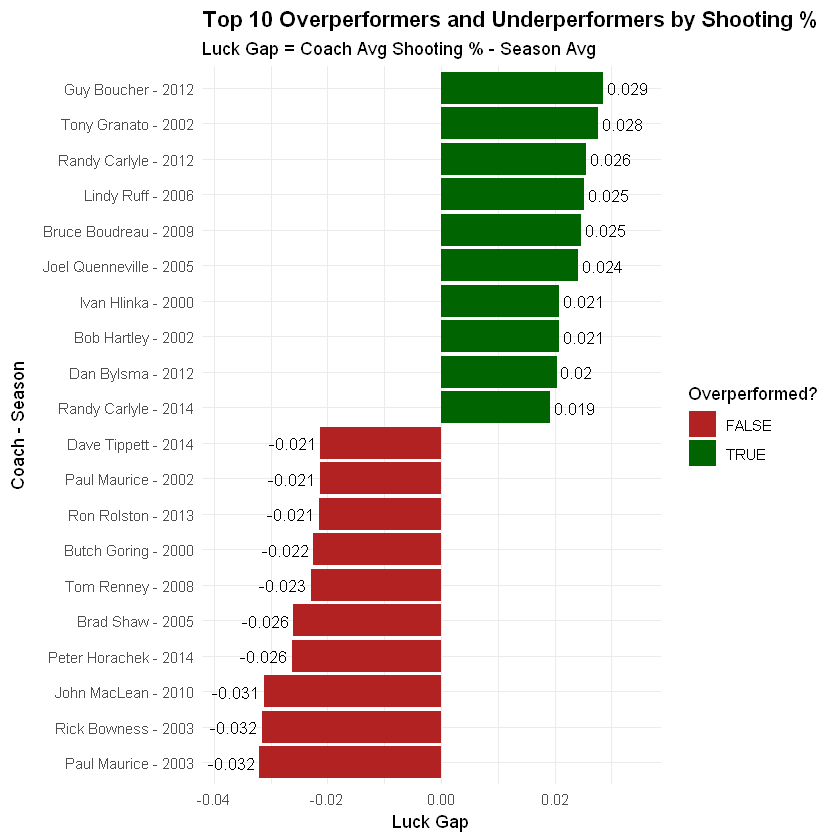

In [14]:
padding <- max(abs(top_bottom_10$luck_gap)) * 0.2

ggplot(top_bottom_10, aes(x = reorder(coach_season_label, luck_gap), y = luck_gap, fill = luck_gap > 0)) +
  geom_col() +
  geom_text(aes(label = round(luck_gap, 3)), 
            hjust = ifelse(top_bottom_10$luck_gap > 0, -0.1, 1.1), 
            color = "black", size = 3.5) +
  coord_flip() +
  scale_fill_manual(values = c("TRUE" = "darkgreen", "FALSE" = "firebrick")) +
  labs(
    title = "Top 10 Overperformers and Underperformers by Shooting %",
    subtitle = "Luck Gap = Coach Avg Shooting % - Season Avg",
    x = "Coach - Season",
    y = "Luck Gap",
    fill = "Overperformed?"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold")) +
  expand_limits(y = c(min(top_bottom_10$luck_gap) - padding, 
                      max(top_bottom_10$luck_gap) + padding))

Now we check to see if the coach was fired during or after the season

In [15]:
coach_seasons <- coachdata %>%
  mutate(season_start = as.integer(substr(game_id, 1, 4))) %>%
  distinct(team_id, head_coach, season_start)
coach_seasons

team_id,head_coach,season_start
<int>,<chr>,<int>
25,Ken Hitchcock,2000
21,Bob Hartley,2000
9,Jacques Martin,2000
6,Pat Burns,2000
16,Alpo Suhonen,2000
7,Lindy Ruff,2000
23,Marc Crawford,2000
4,Craig Ramsay,2000
20,Don Hay,2000


In [16]:
coach_seasons_to_evaluate <- coach_seasons %>%
  filter(season_start < 2017)

In [17]:
coach_with_next <- coach_seasons_to_evaluate %>%
  left_join(
    coach_seasons %>%
      mutate(next_season = season_start - 1),
    by = c("team_id", "season_start" = "next_season", "head_coach")
  )
  coach_with_next

team_id,head_coach,season_start,season_start.y
<int>,<chr>,<dbl>,<int>
25,Ken Hitchcock,2000,2001
21,Bob Hartley,2000,2001
9,Jacques Martin,2000,2001
6,Pat Burns,2000,NA
16,Alpo Suhonen,2000,NA
7,Lindy Ruff,2000,2001
23,Marc Crawford,2000,2001
4,Craig Ramsay,2000,NA
20,Don Hay,2000,NA


In [ ]:
coach_with_next <- coach_with_next %>%
  mutate(
    stayed_next_season = ifelse(!is.na(season_start.y), 1, 0)
  )

team_id,head_coach,season_start,season_start.y,stayed_next_season
<int>,<chr>,<dbl>,<int>,<dbl>
25,Ken Hitchcock,2000,2001,1
21,Bob Hartley,2000,2001,1
9,Jacques Martin,2000,2001,1
6,Pat Burns,2000,NA,0
16,Alpo Suhonen,2000,NA,0
7,Lindy Ruff,2000,2001,1
23,Marc Crawford,2000,2001,1
4,Craig Ramsay,2000,NA,0
20,Don Hay,2000,NA,0


In [19]:
coach_with_next <- coach_with_next %>%
  mutate(
    team_id = as.integer(team_id),
    season_start = as.character(season_start)
    )

In [20]:
coach_season_summary <- coach_season_summary %>%
  left_join(coach_with_next %>% select(team_id, head_coach, season_start, stayed_next_season),
            by = c("team_id", "head_coach", "season_start"))
coach_season_summary

coach_season,head_coach,season_start,team_id,total_goals,total_shots,win_tot,win_rate,games,avg_shooting_pct,Szn_Avg_shooting_pct,luck_gap,stayed_next_season
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Adam Oates ( 2012 ),Adam Oates,2012,15,146,1350,27,0.5625000,48,0.11000000,0.094,1.600000e-02,1
Adam Oates ( 2013 ),Adam Oates,2013,15,225,2413,38,0.4634146,82,0.09536585,0.092,3.365854e-03,0
Adam Oates ( 2014 ),Adam Oates,2014,1,100,1077,20,0.4347826,46,0.09760870,0.092,5.608696e-03,0
Alain Vigneault ( 2000 ),Alain Vigneault,2000,8,48,603,5,0.2500000,20,0.08300000,0.102,-1.900000e-02,0
Alain Vigneault ( 2006 ),Alain Vigneault,2006,23,217,2405,49,0.5975610,82,0.09524390,0.100,-4.756098e-03,1
Alain Vigneault ( 2007 ),Alain Vigneault,2007,23,207,2252,39,0.4756098,82,0.09695122,0.097,-4.878049e-05,1
Alain Vigneault ( 2008 ),Alain Vigneault,2008,23,243,2335,45,0.5487805,82,0.10926829,0.097,1.226829e-02,1
Alain Vigneault ( 2009 ),Alain Vigneault,2009,23,268,2534,49,0.5975610,82,0.10963415,0.095,1.463415e-02,1
Alain Vigneault ( 2010 ),Alain Vigneault,2010,23,258,2624,54,0.6585366,82,0.10317073,0.093,1.017073e-02,1


In [ ]:
unlucky <- coach_season_summary %>%
  filter(luck_gap < -0.02) %>%
  arrange(luck_gap)
  
unlucky %>% select(head_coach, team_id, season_start, luck_gap, win_rate, stayed_next_season)

head_coach,team_id,season_start,luck_gap,win_rate,stayed_next_season
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
Paul Maurice,12,2003,-0.03200000,0.2666667,0
Rick Bowness,27,2003,-0.03150000,0.1000000,0
John MacLean,1,2010,-0.03118182,0.2727273,0
Peter Horachek,10,2014,-0.02628571,0.2142857,0
Brad Shaw,2,2005,-0.02600000,0.4500000,0
Tom Renney,3,2008,-0.02290164,0.5081967,0
Butch Goring,2,2000,-0.02246154,0.2615385,0
Ron Rolston,7,2013,-0.02150000,0.2000000,0
Paul Maurice,12,2002,-0.02139024,0.2682927,1


In [43]:
lucky <- coach_season_summary %>%
  filter(luck_gap > 0.02) %>%
  arrange(luck_gap)

lucky %>% select(head_coach, team_id, season_start, luck_gap, win_rate, stayed_next_season)

head_coach,team_id,season_start,luck_gap,win_rate,stayed_next_season
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
Dan Bylsma,5,2012,0.02037500,0.7500000,1
Bob Hartley,11,2002,0.02069231,0.4871795,1
Ivan Hlinka,5,2000,0.02080488,0.5121951,1
Joel Quenneville,21,2005,0.02417073,0.5243902,1
Bruce Boudreau,15,2009,0.02463415,0.6585366,1
Lindy Ruff,7,2006,0.02524390,0.6463415,1
Randy Carlyle,10,2012,0.02558333,0.5416667,1
Tony Granato,21,2002,0.02770588,0.6274510,1
Guy Boucher,14,2012,0.02858065,0.4193548,0


In [30]:
unlucky_coaches <- coach_season_summary %>%
  filter(luck_gap < 0, !is.na(stayed_next_season))

percent_fired_unlucky <- mean(unlucky_coaches$stayed_next_season == 0) * 100

cat("Percentage of unlucky coaches who got fired:", round(percent_fired_unlucky, 1), "%\n")

Percentage of unlucky coaches who got fired: 37.4 %


In [31]:
lucky_coaches <- coach_season_summary %>%
  filter(luck_gap > 0, !is.na(stayed_next_season))

percent_fired_lucky <- mean(lucky_coaches$stayed_next_season == 0) * 100

cat("Percentage of unlucky coaches who got fired:", round(percent_fired_lucky, 1), "%\n")

Percentage of unlucky coaches who got fired: 27.3 %


In [34]:
coach_season_summary %>%
  filter(!is.na(stayed_next_season)) %>% 
  mutate(
    luck_category = ifelse(luck_gap < 0, "Unlucky", "Lucky")
  ) %>%
  group_by(luck_category) %>%
  summarise(
    Fired = mean(stayed_next_season == 0),
    Retained = mean(stayed_next_season == 1),
    Count = n()
  )


luck_category,Fired,Retained,Count
<chr>,<dbl>,<dbl>,<int>
Lucky,0.2734375,0.7265625,256
Unlucky,0.3736655,0.6263345,281


In [37]:
luck_firing_summary <- coach_season_summary %>%
  filter(!is.na(stayed_next_season)) %>%
  mutate(
    luck_category = ifelse(luck_gap < 0, "Unlucky", "Lucky")
  ) %>%
  group_by(luck_category) %>%
  summarise(
    firing_rate = mean(stayed_next_season == 0),
    count = n()
  )

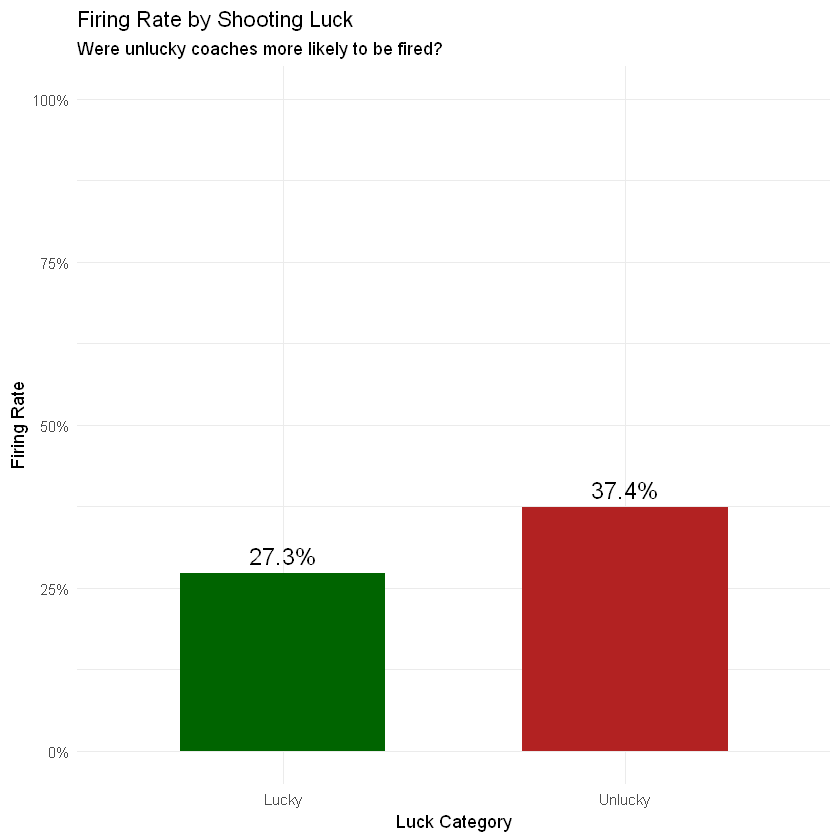

In [38]:
ggplot(luck_firing_summary, aes(x = luck_category, y = firing_rate, fill = luck_category)) +
  geom_col(width = 0.6) +
  geom_text(aes(label = paste0(round(firing_rate * 100, 1), "%")), 
            vjust = -0.5, size = 5) +
  scale_y_continuous(labels = scales::percent_format(), limits = c(0, 1)) +
  scale_fill_manual(values = c("Unlucky" = "firebrick", "Lucky" = "darkgreen")) +
  labs(
    title = "Firing Rate by Shooting Luck",
    subtitle = "Were unlucky coaches more likely to be fired?",
    x = "Luck Category",
    y = "Firing Rate"
  ) +
  theme_minimal() +
  theme(legend.position = "none")


Now to check if a low shooting percentage leads to losing?

In [39]:
cor_test <- cor.test(coach_season_summary$avg_shooting_pct, coach_season_summary$win_rate)
cor_test


	Pearson's product-moment correlation

data:  coach_season_summary$avg_shooting_pct and coach_season_summary$win_rate
t = 13.474, df = 566, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4278806 0.5526663
sample estimates:
     cor 
0.492803 


`geom_smooth()` using formula = 'y ~ x'


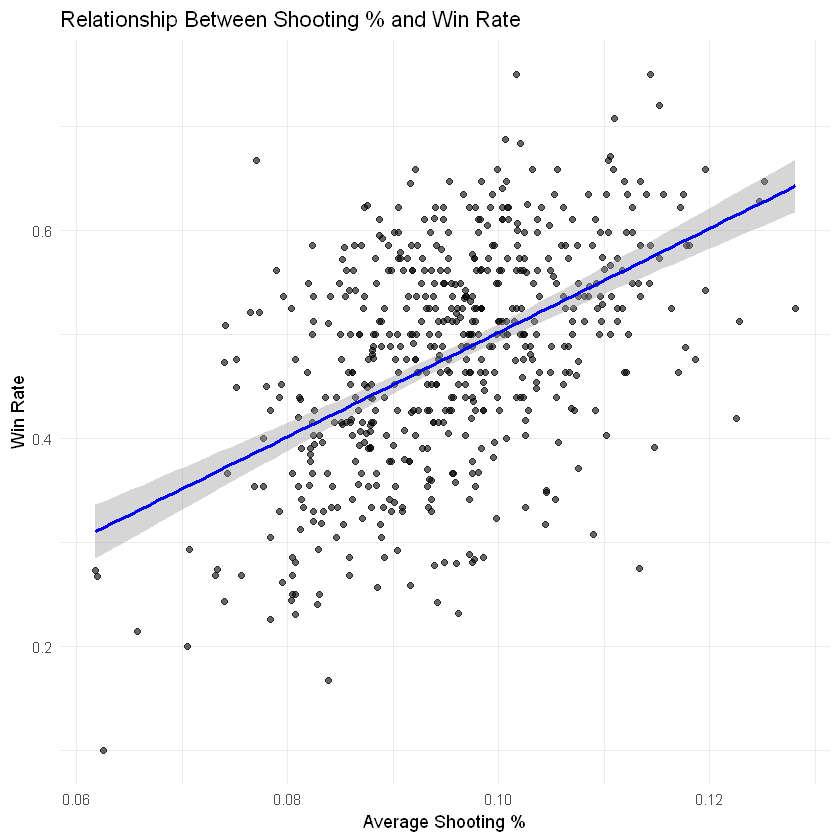

In [40]:
ggplot(coach_season_summary, aes(x = avg_shooting_pct, y = win_rate)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Relationship Between Shooting % and Win Rate",
    x = "Average Shooting %",
    y = "Win Rate"
  ) +
  theme_minimal()

In [41]:
model <- lm(win_rate ~ avg_shooting_pct, data = coach_season_summary)
summary(model)


Call:
lm(formula = win_rate ~ avg_shooting_pct, data = coach_season_summary)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.293665 -0.058955  0.001357  0.066329  0.280011 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.0006648  0.0356455   0.019    0.985    
avg_shooting_pct 5.0074444  0.3716415  13.474   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09253 on 566 degrees of freedom
Multiple R-squared:  0.2429,	Adjusted R-squared:  0.2415 
F-statistic: 181.5 on 1 and 566 DF,  p-value: < 2.2e-16
